## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

mice_number = len(combined["Mouse ID"].unique())
mice_number

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined[combined.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"]


909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

combined.loc[combined.loc[:,"Mouse ID"] =='g989',:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'first')
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_df["Mouse ID"].unique())
mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean
mean = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()['Tumor Volume (mm3)']

# median
median = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()['Tumor Volume (mm3)']

# variance
variance = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()['Tumor Volume (mm3)']

# std
std = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()['Tumor Volume (mm3)']

# sem
sem = clean_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()['Tumor Volume (mm3)']

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary = {
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std,
    'SEM': sem
}
summary_stat = pd.DataFrame(summary)
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median', 'var','std','sem']})

summary = {
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std,
    'SEM': sem
}
summary_stat = pd.DataFrame(summary)
summary_stat


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

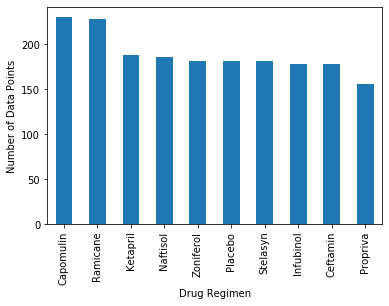

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# counts = clean_df.loc[:,["Mouse ID","Drug Regimen"]].drop_duplicates()["Drug Regimen"].value_counts()

counts = clean_df['Drug Regimen'].value_counts()

counts.plot(kind ='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)
plt.show()

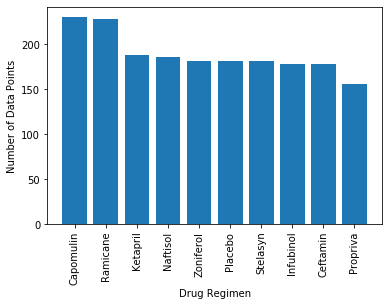

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = clean_df['Drug Regimen'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation = 90)
plt.show()


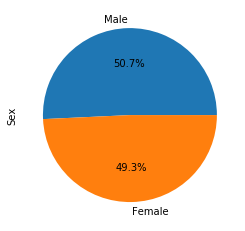

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_df["Sex"].value_counts()
counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.show()


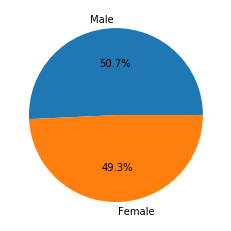

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.loc[:, ["Mouse ID", "Timepoint"]].groupby("Mouse ID").max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time_data = pd.merge(max_time, clean_df, on = ["Mouse ID", "Timepoint"], how = 'left')
max_time_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
        
    # add subset 
        
    # Determine outliers using upper and lower bounds
    
for each_drug in regimen:

    filter_df = max_time_data.loc[:, "Drug Regimen"]==each_drug
    quantiles = [.25,.5,.75]
    one_drug_tumor_vol = max_time_data.loc[filter_df, "Tumor Volume (mm3)"]
    tumor_vol_list.append(one_drug_tumor_vol)
        
    quartiles = max_time_data.loc[filter_df,:].quantile(quantiles)

    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
# outlier_df = max_time_data.loc[(one_drug_tumor_vol > upper_bound) | (one_drug_tumor_vol < lower_bound)]
# outlier_count = len(one_drug_tumor_vol.loc[outlier_df])

# print (f"There are {outlier_count} outliers for {each_drug}")
    

Values below Timepoint            -30.00000
Age_months           -15.00000
Weight (g)            23.00000
Tumor Volume (mm3)    25.35545
Metastatic Sites      -4.50000
dtype: float64 could be outliers.
Values above Timepoint             90.000000
Age_months            41.000000
Weight (g)            31.000000
Tumor Volume (mm3)    87.666458
Metastatic Sites       7.500000
dtype: float64 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x242ee5e9d08>,
 'caps': [<matplotlib.lines.Line2D at 0x242ee5f5f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x242ee5e1bc8>,
 'medians': [<matplotlib.lines.Line2D at 0x242ee5faf08>,
 'fliers': [<matplotlib.lines.Line2D at 0x242ee5faf88>,
 'means': []}

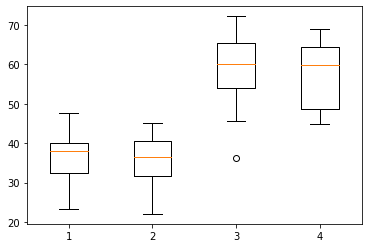

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list)

## Line and Scatter Plots

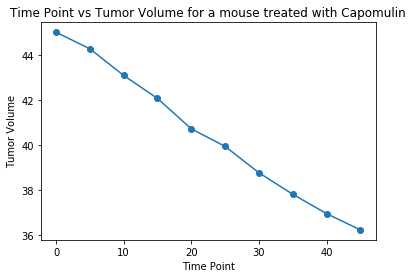

In [39]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = combined.loc[combined["Drug Regimen"]=="Capomulin"]
tumor_vol_mean = capomulin_data[["Tumor Volume (mm3)", "Timepoint"]].groupby("Timepoint").mean()['Tumor Volume (mm3)']


x_axis = [0,5,10,15,20,25,30,35,40,45]


plt.plot(x_axis, tumor_vol_mean, marker = 'o')
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.title('Time Point vs Tumor Volume for a mouse treated with Capomulin')
plt.show()

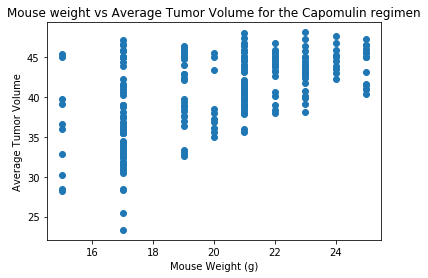

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = combined.loc[combined["Drug Regimen"]=="Capomulin"]

avg_tumor = capomulin_data[["Tumor Volume (mm3)", "Weight (g)"]].groupby("Weight (g)").mean()['Tumor Volume (mm3)']

x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse weight vs Average Tumor Volume for the Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.53
The r-squared is: 0.2763600223455911


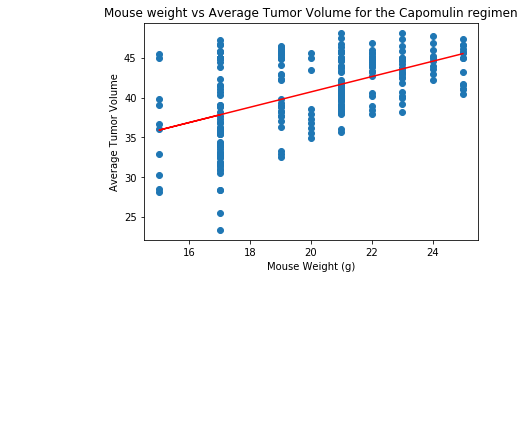

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_data = combined.loc[combined["Drug Regimen"]=="Capomulin"]

avg_tumor = capomulin_data[["Tumor Volume (mm3)", "Weight (g)"]].groupby("Weight (g)").mean()['Tumor Volume (mm3)']

x_axis = capomulin_data["Weight (g)"]
y_axis = capomulin_data["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_axis, y_axis)
(s,i,r,p,std) = linregress(x_axis, y_axis)
regress = x_axis*s + i
line_eq = "y=" + str(round(s,2))+"x+" +str(round(i,2))

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress, "r-")
plt.annotate(line_eq,(10,0), fontsize=15, color = "red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title("Mouse weight vs Average Tumor Volume for the Capomulin regimen")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {r**2}")
plt.show()

